<a href="https://colab.research.google.com/github/muthumeenal12/license_plate_recognition/blob/main/licesnce_plate_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.5 MB/s eta 0:00:00


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

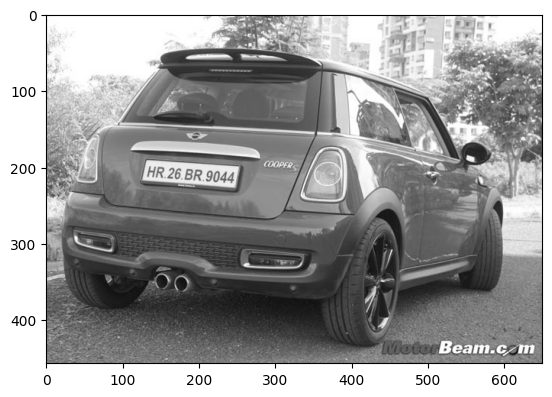

In [ ]:
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

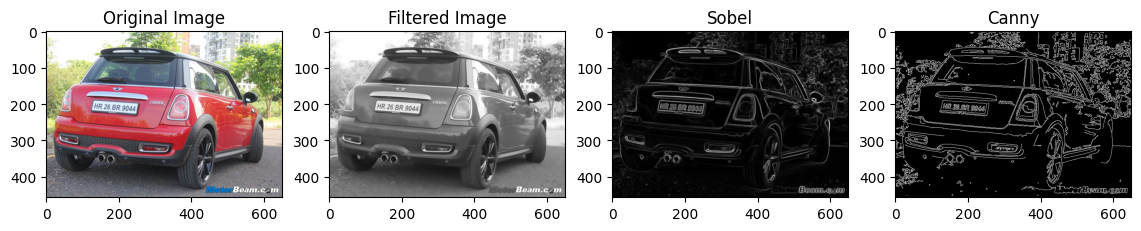

In [75]:
filtered_image = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
#canny
edged = cv2.Canny(filtered_image, 30, 200)

#sobel
sobel_x = cv2.Sobel(filtered_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(filtered_image, cv2.CV_64F, 0, 1, ksize=5)

# Combine the Sobel X and Sobel Y results to get the magnitude
edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Optionally, you can apply thresholding to highlight edges
threshold = 50
edge_binary = np.uint8(edge_magnitude > threshold)

plt.figure(figsize=(14, 6))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(142)
plt.title('Filtered Image')
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))

plt.subplot(143)
plt.title('Sobel')
plt.imshow(edge_magnitude, cmap='gray')

plt.subplot(144)
plt.title('Canny')
plt.imshow(edged, cmap='gray')
plt.show()

In [61]:
#canny
keypoints1 = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours1 = imutils.grab_contours(keypoints1)
contours1 = sorted(contours1, key=cv2.contourArea, reverse=True)[:10]

#sobel
keypoints= cv2.findContours(edge_binary.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [64]:
#sobel
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
#canny
location1 = None
for contour in contours1:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location1 = approx
        break

In [47]:
#sobel
location

array([[[277, 216]],

       [[320, 226]],

       [[302, 262]],

       [[263, 236]]], dtype=int32)

In [48]:
#canny
location1

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [65]:
#sobel
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
#canny
mask = np.zeros(gray.shape, np.uint8)
new_image1 = cv2.drawContours(mask, [location1], 0,255, -1)
new_image1= cv2.bitwise_and(img, img, mask=mask)

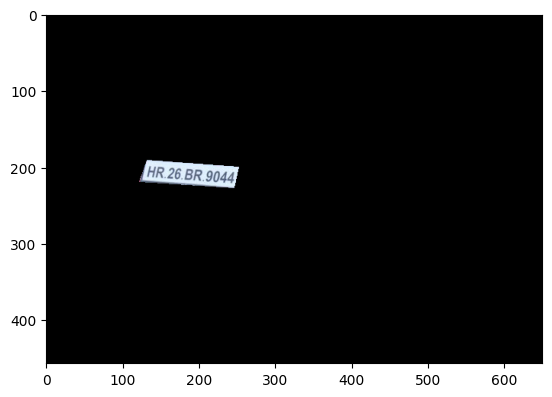

In [71]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

plt.imshow(cv2.cvtColor(new_image1, cv2.COLOR_BGR2RGB));

In [69]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]


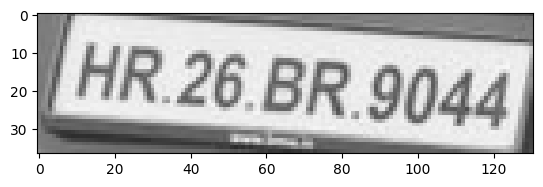

In [70]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [72]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.572802443929149)]

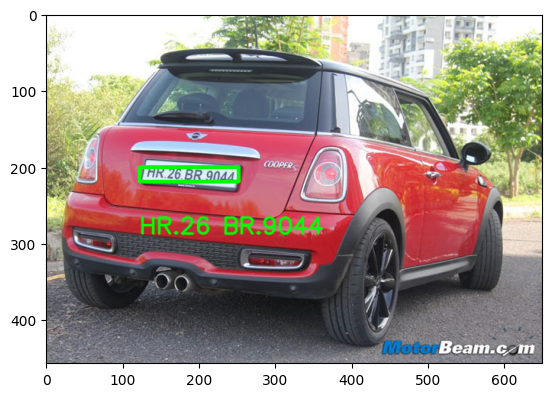

In [73]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))